In [1]:
# classifier: cats vs. dogs
# dataset: https://www.kaggle.com/c/dogs-vs-cats

# ---------------------
# import required packages
# ---------------------
# import required packages
# ---------------------
from __future__ import print_function
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
from random import shuffle
from tqdm import tqdm
import torchvision
from sklearn.linear_model import LogisticRegression
import pandas as pd


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
#loading data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalization
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28)
Number of images in x_train 60000
Number of images in x_test 10000


4


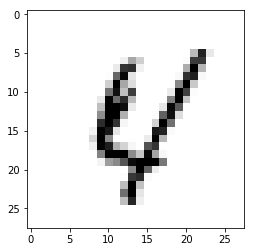

In [3]:
image_index = 700 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 4
plt.imshow(x_train[image_index], cmap='Greys')

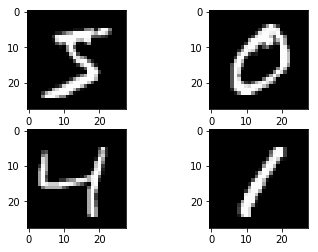

In [4]:
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [5]:
#Initialziation
IMG_SIZE=28
LR=0.001

In [6]:
#Data reshaping
y_train=y_train.reshape((60000,1))
x_train=x_train.reshape((60000,28,28, 1))
x_test=x_test.reshape((10000,28,28,1))
x_train = x_train[30000:, :]
y_train = y_train[30000:, :]
#x_train = np.expand_dims([x_train], axis = -1)
#y_train = np.expand_dims([y_train], axis = -1)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
#checking the shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30000, 28, 28, 1)
(30000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [8]:
'''# define data preparation
datagen = ImageDataGenerator(rotation_range = 270)
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break'''

"# define data preparation\ndatagen = ImageDataGenerator(rotation_range = 270)\n# fit parameters from data\ndatagen.fit(x_train)\n# configure batch size and retrieve one batch of images\nfor X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):\n    # create a grid of 3x3 image\n    for i in range(0, 9):\n        plt.subplot(330 + 1 + i)\n        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))\n    # show the plot\n    plt.show()\n    break"

In [9]:
'''# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(x_test)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_test, y_test, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break'''

"# define data preparation\ndatagen = ImageDataGenerator(zca_whitening=True)\n# fit parameters from data\ndatagen.fit(x_test)\n# configure batch size and retrieve one batch of images\nfor X_batch, y_batch in datagen.flow(x_test, y_test, batch_size=9):\n    # create a grid of 3x3 images\n    for i in range(0, 9):\n        plt.subplot(330 + 1 + i)\n        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))\n    # show the plot\n    plt.show()\n    break"

In [10]:
'''datagen = ImageDataGenerator(samplewise_std_normalization = True)
# fit parameters from data
datagen.fit(x_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    #create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        # show the plot
        plt.show()
        break'''

"datagen = ImageDataGenerator(samplewise_std_normalization = True)\n# fit parameters from data\ndatagen.fit(x_train)\n\n# configure batch size and retrieve one batch of images\nfor X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):\n    #create a grid of 3x3 images\n    for i in range(0, 9):\n        plt.subplot(330 + 1 + i)\n        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))\n        # show the plot\n        plt.show()\n        break"

In [11]:
'''datagen = ImageDataGenerator(samplewise_std_normalization = True)
# fit parameters from data
datagen.fit(x_test)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_test, y_test, batch_size=9):
    #create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        # show the plot
        plt.show()
        break'''

"datagen = ImageDataGenerator(samplewise_std_normalization = True)\n# fit parameters from data\ndatagen.fit(x_test)\n\n# configure batch size and retrieve one batch of images\nfor X_batch, y_batch in datagen.flow(x_test, y_test, batch_size=9):\n    #create a grid of 3x3 images\n    for i in range(0, 9):\n        plt.subplot(330 + 1 + i)\n        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))\n        # show the plot\n        plt.show()\n        break"

In [12]:
# ---------------------
# construct the cnn model for this project
# ---------------------
import tflearn
import tensorflow as tf

from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected, flatten
from tflearn.layers.estimator import regression

def conv_net():
    convnet = input_data(shape = [None, IMG_SIZE, IMG_SIZE, 1],
                        name = 'input')
    print(convnet)
    # conv_2d(incoming, nb_filter, filter_size, ..., activation)
    convnet = conv_2d(convnet, 32, (3,3), activation = 'relu')
    # max_pool_2d(incoming, kernel_size, ...)
    convnet = max_pool_2d(convnet, 2)
    

    #flatten the layer
    print("break_1")
    flatten = tflearn.flatten(convnet)
    # fully_connected(incoming, n_units, activation, ...)
    convnet = fully_connected(flatten, 5, activation = 'relu')
    # dropout(incoming, keep_prob is drop_prob + keep+prob)

    #standard recommendation for the Net arch    
    logits = fully_connected(convnet, 10, activation = 'softmax')
    #convnet = dropout(convnet, 0.8)
    
    #logits
    #logits = tf.layers.dense(inputs=convnet, units=10)
    
    #regression(incoming, optimizer, learning_rate, loss, name, ...)
    convnet = regression(logits, optimizer = 'adam', learning_rate = LR,
                             loss = 'categorical_crossentropy', name = 'targets')

    return convnet

W0701 10:18:05.081003 139655934691072 deprecation_wrapper.py:119] From build/bdist.linux-x86_64/egg/tflearn/helpers/summarizer.py:9: The name tf.summary.merge is deprecated. Please use tf.compat.v1.summary.merge instead.

W0701 10:18:05.081222 139655934691072 deprecation_wrapper.py:119] From build/bdist.linux-x86_64/egg/tflearn/helpers/trainer.py:25: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W0701 10:18:05.084760 139655934691072 deprecation_wrapper.py:119] From build/bdist.linux-x86_64/egg/tflearn/collections.py:13: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0701 10:18:05.087618 139655934691072 deprecation_wrapper.py:119] From build/bdist.linux-x86_64/egg/tflearn/config.py:123: The name tf.get_collection is deprecated. Please use tf.compat.v1.get_collection instead.

W0701 10:18:05.092521 139655934691072 deprecation_wrapper.py:119] From build/bdist.linux-x86_64/egg/tflearn/config.py:129: The

In [13]:

# ---------------------
# define the model
# ---------------------
convnet = conv_net()
model = tflearn.DNN(convnet, tensorboard_dir = 'log')


W0701 10:18:05.106673 139655934691072 deprecation_wrapper.py:119] From build/bdist.linux-x86_64/egg/tflearn/layers/core.py:81: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 10:18:05.109940 139655934691072 deprecation.py:506] From build/bdist.linux-x86_64/egg/tflearn/initializations.py:119: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0701 10:18:05.111963 139655934691072 deprecation.py:323] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/tensorflow/python/util/deprecation.py:507: __init__ (from tensorflow.python.ops.init_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
W0701 10:18:05.136765 13965

Tensor("input/X:0", shape=(?, 28, 28, 1), dtype=float32)
break_1


W0701 10:18:05.519294 139655934691072 deprecation_wrapper.py:119] From build/bdist.linux-x86_64/egg/tflearn/helpers/trainer.py:134: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.



In [14]:

model.fit(x_train,y_train,n_epoch=10)


Training Step: 4689  | total loss: 0.20207 | time: 15.917s
| Adam | epoch: 010 | loss: 0.20207 -- iter: 29952/30000
Training Step: 4690  | total loss: 0.18896 | time: 15.958s
| Adam | epoch: 010 | loss: 0.18896 -- iter: 30000/30000
--


In [15]:
p=model.predict(x_train)
p

array([[4.20272590e-05, 3.89038291e-07, 3.18563287e-03, ...,
        1.17065199e-03, 2.87266797e-03, 4.18935483e-03],
       [1.09915710e-09, 1.93134974e-06, 8.24840463e-09, ...,
        9.99943733e-01, 3.25760077e-08, 4.79764931e-05],
       [9.37734731e-04, 8.03838072e-12, 4.94431697e-05, ...,
        5.44067291e-07, 1.07755500e-03, 1.76952570e-03],
       ...,
       [3.01795546e-04, 6.77375530e-16, 2.50942933e-09, ...,
        8.52891773e-14, 1.48043595e-03, 2.54310929e-04],
       [7.05651973e-06, 1.12315276e-04, 2.22116549e-04, ...,
        2.48323531e-08, 3.21575766e-03, 4.19300632e-05],
       [9.09750725e-06, 8.58702691e-08, 1.47938881e-05, ...,
        3.44926541e-08, 7.11854696e-01, 4.20371629e-02]], dtype=float32)

In [16]:
prediction=np.argmax(p,axis=1)

In [17]:
real_y_label=np.argmax(y_train,axis=1)

In [18]:

train_correct_count=0
for i in range(len(prediction)):
    if (prediction[i]==real_y_label[i]):
        train_correct_count=train_correct_count+1

In [19]:
print("train Accuracy: "+str(train_correct_count/x_train.shape[0]))

train Accuracy: 0


In [20]:
test_correct_count=0;
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_test=y_test.reshape((10000,1))
x_test=x_test.reshape((10000,28,28,1))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
p_test=model.predict(x_test);
prediction_test=np.argmax(p_test,axis=1)
for i in range(len(prediction_test)):
    if (prediction_test[i]==y_test[i]):
        test_correct_count=test_correct_count+1;
print("test Accuracy: "+str(1.0 * test_correct_count/x_test.shape[0]))

test Accuracy: 0.9422


In [21]:
prediction_test

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
y_test

array([[7],
       [2],
       [1],
       ...,
       [4],
       [5],
       [6]], dtype=uint8)

In [23]:
import keras.backend as K
# Get current session (assuming tf backend)
sess = K.get_session()
# Initialize adversarial example with input image
x_adv = x_test
# Added noise
x_noise = np.zeros_like(x_test)

In [24]:
# Set variables
epochs = 10
epsilon = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
target_class = 10 
prev_probs = []

In [26]:
for i in range(epochs): 
    # One hot encode the target class
    target = K.one_hot(target_class, 10)
    
    # Get the loss and gradient of the loss wrt the inputs
    loss = -1*K.categorical_crossentropy(target, convnet)
    grads = K.gradients(loss, convnet)

    # Get the sign of the gradient
    delta = K.sign(grads[0])
    x_noise = x_noise + delta

    # Perturb the image
    x_adv = x_adv + epsilon*delta

    # Get the new image and predictions
    x_adv = sess.run(x_adv, feed_dict={convnet:x_test})
    preds = model.predict(x_adv)

    # Store the probability of the target class
    prev_probs.append(preds[0][target_class])

    if i%20==0:
        print(i, preds[0][target_class], MNIST.decode_predictions(preds, top=10)[0])

ValueError: Cannot feed value of shape (10000, 1) for Tensor u'FullyConnected_1/Softmax:0', which has shape '(?, 10)'

In [ ]:
'''from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model'''

In [ ]:
'''import tensorflow as tf
import keras
from keras import backend
from keras.datasets import mnist
from cleverhans.attacks import FastGradientMethod
from cleverhans.attacks import BasicIterativeMethod
from cleverhans.utils_keras import KerasModelWrapper
backend.set_learning_phase(False)
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
load_data = mnist.load_data()
y_test=y_test.reshape((10000,1))
x_test=x_test.reshape((10000,28,28,1))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
sess =  backend.get_session()
wrap = KerasModelWrapper(load_data)
fgsm = FastGradientMethod(wrap, sess=sess)
fgsm_params = {'eps': 0.3,
               'clip_min': 0.,
               'clip_max': 1.}
adv_x = fgsm.generate_np(x_test.shape[0], **fgsm_params)

adv_pred = np.argmax(keras_model.predict(adv_x), axis = 1)
adv_acc =  np.mean(np.equal(adv_pred, y_test))

print("The adversarial validation accuracy is: {}".format(adv_acc))''''


In [ ]:
'''# Define a function that stitches the 28 * 28 numpy arrays
# together into a collage.
def stitch_images(images, y_img_count, x_img_count, margin = 2):
    
    # Dimensions of the images
    img_width = images[0].shape[0]
    img_height = images[0].shape[1]
    
    width = y_img_count * img_width + (y_img_count - 1) * margin
    height = x_img_count * img_height + (x_img_count - 1) * margin
    stitched_images = np.zeros((width, height, 3))

    # Fill the picture with our saved filters
    for i in range(y_img_count):
        for j in range(x_img_count):
            img = images[i * x_img_count + j]
            if len(img.shape) == 2:
                img = np.dstack([img] * 3)
            stitched_images[(img_width + margin) * i: (img_width + margin) * i + img_width,
                            (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img

    return stitched_images

x_sample = x_test[0].reshape(28, 28)
adv_x_sample = adv_x[0].reshape(28, 28)

adv_comparison = stitch_images([x_sample, adv_x_sample], 1, 2)

plt.imshow(adv_comparison)
plt.show()'''